In [2]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

<h4>Load the MNIST dataset and split into training and test sets</h4>

Epoch 1/5
1688/1688 [==============================] - 27s 16ms/step - loss: 0.1531 - accuracy: 0.9529 - val_loss: 0.0488 - val_accuracy: 0.9855
Epoch 2/5
1688/1688 [==============================] - 29s 17ms/step - loss: 0.0525 - accuracy: 0.9835 - val_loss: 0.0436 - val_accuracy: 0.9872
Epoch 3/5
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0375 - accuracy: 0.9879 - val_loss: 0.0391 - val_accuracy: 0.9892
Epoch 4/5
1688/1688 [==============================] - 28s 16ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.0435 - val_accuracy: 0.9893
Epoch 5/5
1688/1688 [==============================] - 33s 19ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0442 - val_accuracy: 0.9868
Epoch 1/5
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0399 - val_accuracy: 0.9890
Epoch 2/5
1688/1688 [==============================] - 39s 23ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0468 - val_ac

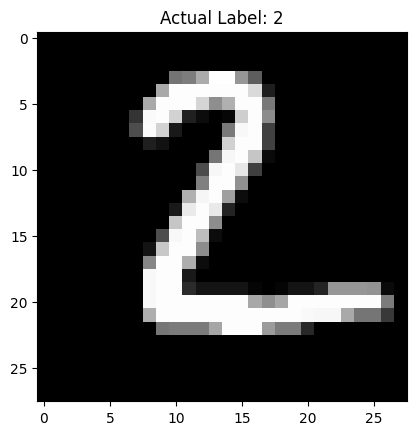

1/1 [==============================] - 0s 98ms/step
Predicted digit: 2


In [4]:

#Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Preprocess the data
x_train = x_train / 255.0  # Normalize to 0-1
x_test = x_test / 255.0

# Reshape for CNN input (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# After training the model
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Save the trained model to a file
model.save("digit_model.h5")
print("Model saved as digit_model.h5")

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.2f}")

# Step 7: Predict a sample digit
index = 1  # pick any digit from test set
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Actual Label: {}".format(y_test[index]))
plt.show()

prediction = model.predict(np.expand_dims(x_test[index], axis=0))
print(f"Predicted digit: {np.argmax(prediction)}")
